In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas is used for data mainpulation and analysis.
# numpy is used for numerical operations
# matplotlib and seaborn are used for data visualizaton.

In [18]:
df = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Data Cleaning and Transformation

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [20]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [21]:
df.shape

(148, 7)

In [22]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [23]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
df["rate"] = df["rate"].apply(handleRate)    

In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# 1) What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'types of Resturant')

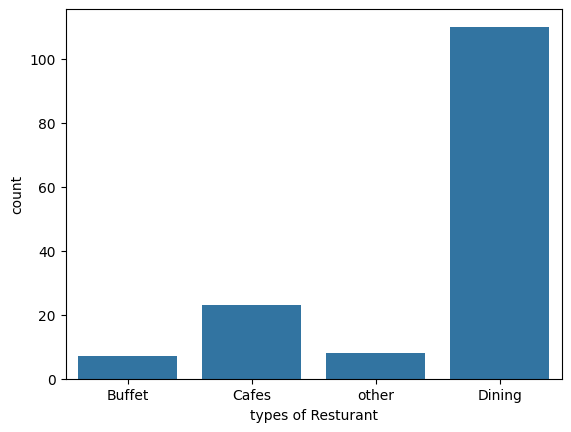

In [25]:
sns.countplot(x = df["listed_in(type)"])
plt.xlabel("types of Resturant")

# the majority of the rest. fall into the dinnig category.

# 2 How many votes has each type of restaurant received from customers

Text(0, 0.5, 'votes')

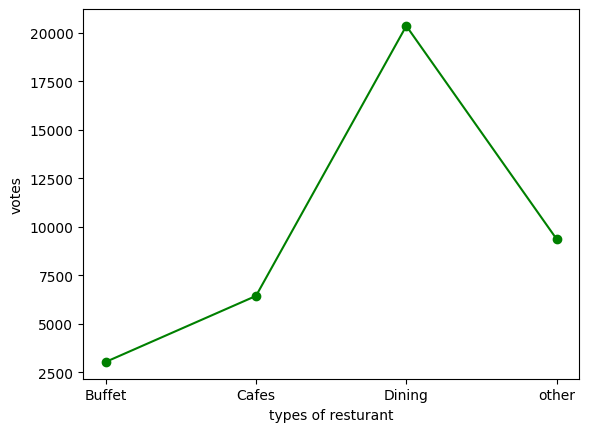

In [32]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = "green",marker = "o")
plt.xlabel("types of resturant")
plt.ylabel("votes")

# 3) What are the ratings that the majority of restaurants have received?

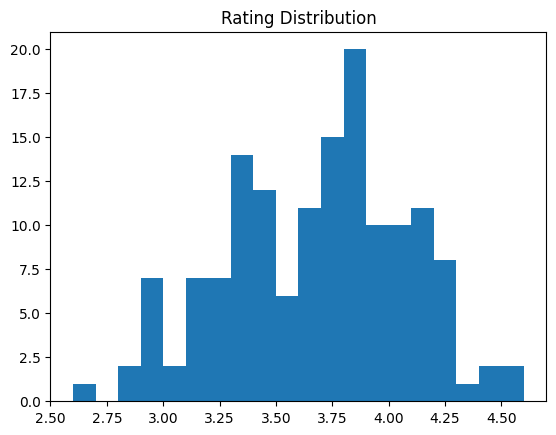

In [37]:
plt.hist(df["rate"],bins = 20)
plt.title("Rating Distribution")
plt.show()

# the majority rating is 3.5 to 4.

# 4)Zomato has observed that most couples order most of their food online. What is their average spending on each order

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

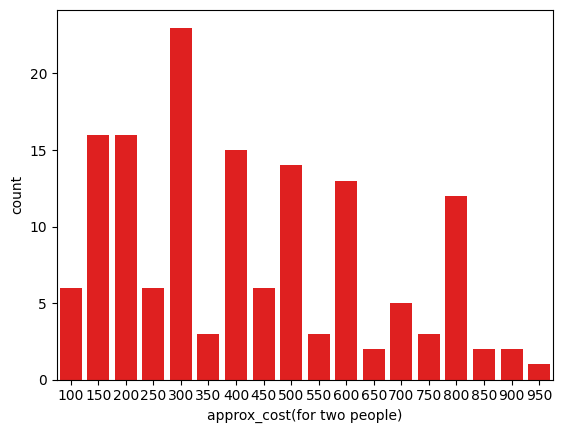

In [39]:
couple_data = df["approx_cost(for two people)"]
sns.countplot(x=  couple_data,color = 'red')

 # 5) Which mode (online or offline) has received the maximum rating

In [40]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='count'>

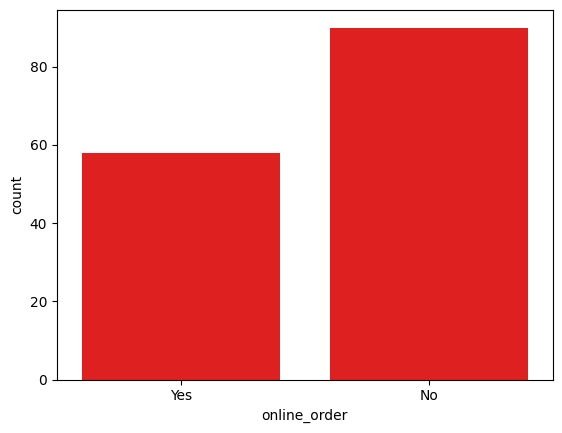

In [41]:
couple_data = df["online_order"]
sns.countplot(x=  couple_data,color = 'red')

<Axes: xlabel='online_order', ylabel='rate'>

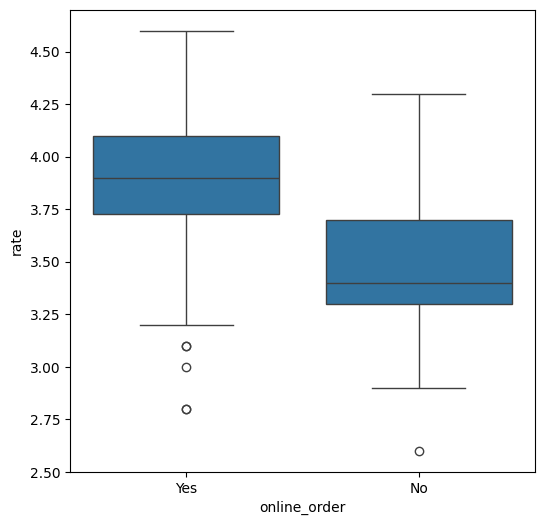

In [43]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order",y = "rate", data = df)

In [44]:
# online order : high rating
# offline order : low office

# 6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers

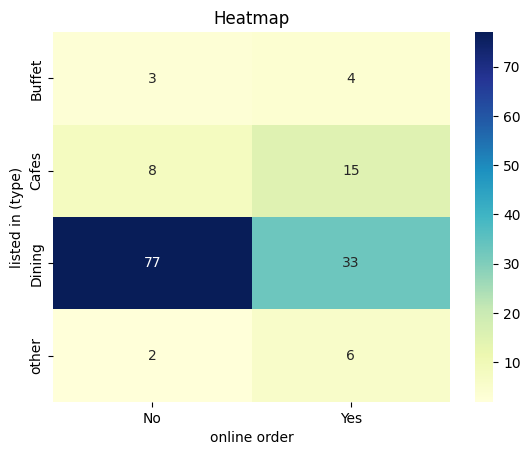

In [50]:
pivot_table = df.pivot_table(index ="listed_in(type)",columns = "online_order",aggfunc = "size",fill_value = 0)
sns.heatmap(pivot_table,annot = True,fmt = "d",cmap = "YlGnBu")
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel("listed in (type)")
plt.show()

In [51]:
# dinning restrant accpets offline orders,
# whereas cafes acceps online orders